In [1]:
from bokeh.plotting import figure,show
from bokeh.io import output_notebook
import librosa
import librosa.display
import numpy as np
from scipy.io import wavfile
import pandas as pd


output_notebook()

Loading BokehJS ...

In [2]:
annotations = pd.read_csv(filepath_or_buffer='../data/MagnaTagATune/annotations_final.csv', sep='\t')
rand_int = np.random.randint(0,len(annotations['mp3_path']))
song_path = '../data/MagnaTagATune/rawwav/' + annotations['mp3_path'][rand_int][:-3] + 'wav'
_ ,song = wavfile.read(song_path)
song = np.float32(song)
print(len(song))

465984


In [3]:
S = librosa.feature.melspectrogram(y=song, sr =16000)
S_db = librosa.power_to_db(S, ref=np.max)

In [6]:
p = figure(plot_width = 900, plot_height = 400, title = 'Raw audio')
p.line(np.arange(0,len(song)), song)
show(p)

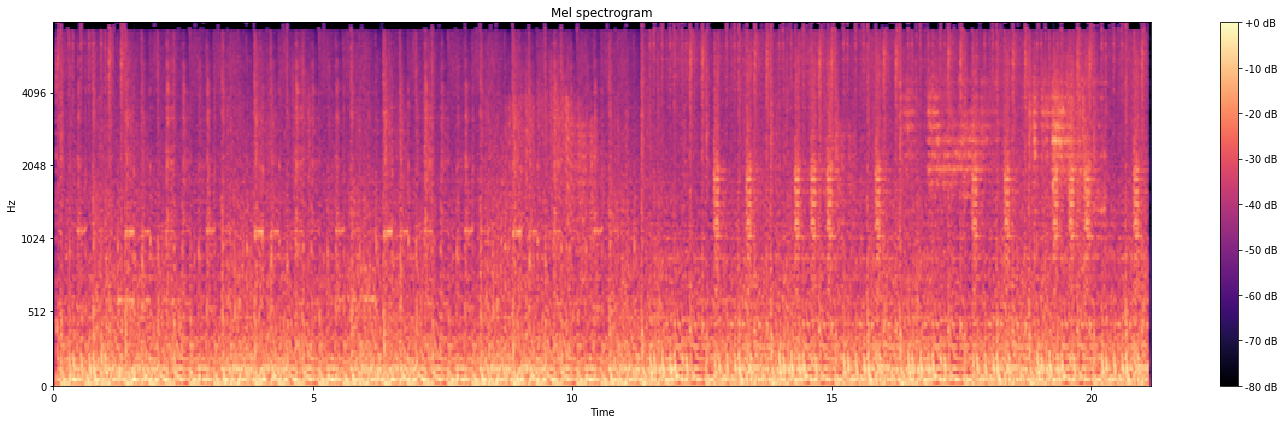

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
librosa.display.specshow(librosa.power_to_db(S,
                                              ref=np.max),
                          y_axis='mel', fmax=8000,
                          x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()

In [10]:
S.shape

(128, 911)